In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('world_happiness_wo_null.csv', index_col=0)

In [3]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,GDP per Capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Year
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2015
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2015


# Objective

The objective of machine learning on this data is to predict the Happiness Rank of a country based on features selected to build a prediction model.

# Feature Engineering

Features that will be selected to build a model will be chosen based on its correlation to the target feature, that is Happiness Rank

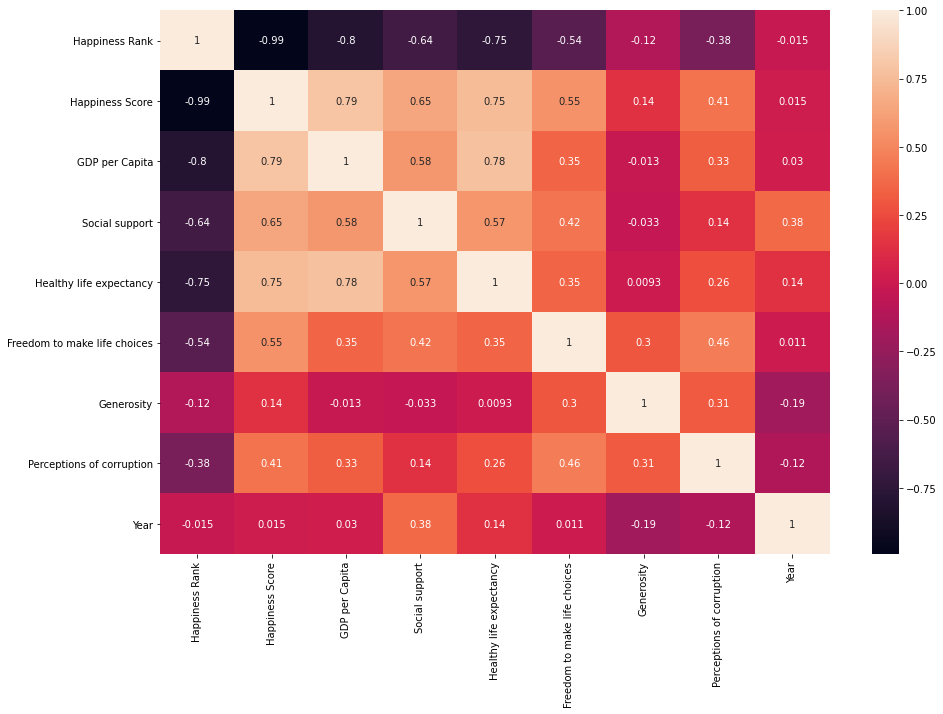

In [4]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True)


plt.xticks(rotation = 90)
plt.show()

# **Machine Learning**

Since Happiness Score feature is redundant to Happiness Rank, happiness score will be dropped from data that will be used to build the model. Feature 'Year' also will be dropped since it's relatively not significant to overall Happiness Rank.
Happiness Score and Rank is associated with features scores, such as GDP per Capita, Social support, etc, and not associated with Country and Region, that is why Country and Region will also be dropped before building machine learning model.

In [5]:
df.drop(columns=['Happiness Score', 'Year', 'Country', 'Region'], inplace=True)

In [6]:
df.head()

,Happiness Rank,GDP per Capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978
1,2,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145
2,3,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357
3,4,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503
4,5,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957


## Splitting data

In [7]:
X = df.drop(columns=['Happiness Rank'])
y = df['Happiness Rank']

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Linear Regression with StandardScaler

In [10]:
from sklearn.linear_model import LinearRegression

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [11]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 534 entries, 95 to 102
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GDP per Capita                534 non-null    float64
 1   Social support                534 non-null    float64
 2   Healthy life expectancy       534 non-null    float64
 3   Freedom to make life choices  534 non-null    float64
 4   Generosity                    534 non-null    float64
 5   Perceptions of corruption     534 non-null    float64
dtypes: float64(6)
memory usage: 29.2 KB


In [12]:
# num_features = ['GDP per Capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
# cat_features = ['Country', 'Region']

In [13]:
# num_pipeline = Pipeline([
#     ('scaled', StandardScaler())
# ])

# cat_pipeline = Pipeline([
#     ('encoded', OneHotEncoder())
# ])

In [18]:
preprocess = ColumnTransformer([
    ('scaled', StandardScaler(), ['GDP per Capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']),
])

In [15]:
# X_train_preprocessed = preprocess.fit_transform(X_train)
# X_test_preprocessed = preprocess.fit_transform(X_test)

In [29]:
reg_scaled = Pipeline([
    ('prep', preprocess),
    ('algo', LinearRegression())
])

In [30]:
reg_scaled.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('scaled', StandardScaler(),
                                                  ['GDP per Capita',
                                                   'Social support',
                                                   'Healthy life expectancy',
                                                   'Freedom to make life '
                                                   'choices',
                                                   'Generosity',
                                                   'Perceptions of '
                                                   'corruption'])])),
                ('algo', LinearRegression())])

In [33]:
y_pred_scaled = reg_scaled.predict(X_test)

In [32]:
# Model Evaluation

from sklearn.metrics import r2_score

In [34]:
r2_score(y_test, y_pred_scaled)

0.7508951479781366

### Linear Regression with Polynomial feature

In [24]:
from sklearn.preprocessing import PolynomialFeatures

In [25]:
poly = Pipeline([
    ('transform', preprocess),
    ('poly', PolynomialFeatures())
])

model_poly = Pipeline([
    ('prep_poly', poly),
    ('algo', LinearRegression())
])

In [26]:
model_poly.fit(X_train, y_train)

Pipeline(steps=[('prep_poly',
                 Pipeline(steps=[('transform',
                                  ColumnTransformer(transformers=[('scaled',
                                                                   StandardScaler(),
                                                                   ['GDP per '
                                                                    'Capita',
                                                                    'Social '
                                                                    'support',
                                                                    'Healthy '
                                                                    'life '
                                                                    'expectancy',
                                                                    'Freedom '
                                                                    'to make '
                                                    

In [27]:
y_pred_poly = model_poly.predict(X_test)

In [28]:
r2_score(y_test, y_pred_poly)

0.7523812385844268

## Linear Regression

In [35]:
reg = LinearRegression()

In [37]:
reg.fit(X_train, y_train)

LinearRegression()

In [38]:
y_pred_reg = reg.predict(X_test)

In [39]:
r2_score(y_test, y_pred_reg)

0.7508951479781366

## RandomForest

In [40]:
from sklearn.ensemble import RandomForestRegressor

In [41]:
mod_RF = RandomForestRegressor()

In [42]:
mod_RF.fit(X_train, y_train)

RandomForestRegressor()

In [43]:
y_pred_RF = mod_RF.predict(X_test)

In [44]:
r2_score(y_test, y_pred_RF)

0.8041769905923866

### Decision Tree

In [45]:
from sklearn.tree import DecisionTreeRegressor

In [46]:
mod_DT = DecisionTreeRegressor()

In [47]:
mod_DT.fit(X_train, y_train)

DecisionTreeRegressor()

In [48]:
y_pred_DT = mod_DT.predict(X_test)

In [49]:
r2_score(y_test, y_pred_DT)

0.6424516210205655

### Random Forest with Hyperparameter Tuning

In [52]:
from sklearn.model_selection import GridSearchCV

In [50]:
hype_RF = RandomForestRegressor()

In [51]:
hype_RF.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [59]:
params_RF = {
    'n_estimators': range(100, 200, 50),
    'max_depth': [None, 3, 5, 7],
    'min_samples_leaf': range(1, 10, 2),
    'min_samples_split': range(2, 20, 4),
    'max_features': [None, 'sqrt']
}

In [60]:
RF_gs = GridSearchCV(hype_RF, params_RF, cv=5, n_jobs=-1, verbose=-1)

In [61]:
RF_gs.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:   23.1s
[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed:   38.3s
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:   59.8s
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:  1.1min finished


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 3, 5, 7],
                         'max_features': [None, 'sqrt'],
                         'min_samples_leaf': range(1, 10, 2),
                         'min_samples_split': range(2, 20, 4),
                         'n_estimators': range(100, 200, 50)},
             verbose=-1)

In [62]:
RF_gs.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 150}

In [63]:
hyper_model = RandomForestRegressor(max_depth=None, max_features='sqrt', min_samples_leaf=1, min_samples_split=6, n_estimators=150)

In [64]:
hyper_model.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', min_samples_split=6,
                      n_estimators=150)

In [65]:
y_pred_hype = hyper_model.predict(X_test)

In [66]:
r2_score(y_test, y_pred_hype)

0.7989755629758766

===============================================================================

# Evaluation

In [67]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [68]:
summary = pd.DataFrame()

In [69]:
summary['Model'] = ['Linear Regression', 'Polynomial Regression', 'Linear Regression with Standard Scaler', 'Random Forest', 'Random Forest with Hyper Parameter Tuning']

In [71]:
summary['MAE'] = [mean_absolute_error(y_test, y_pred_reg), mean_absolute_error(y_test, y_pred_poly), mean_absolute_error(y_test, y_pred_scaled), mean_absolute_error(y_test, y_pred_RF), mean_absolute_error(y_test, y_pred_hype)]
summary['MSE'] = [mean_squared_error(y_test, y_pred_reg), mean_squared_error(y_test, y_pred_poly), mean_squared_error(y_test, y_pred_scaled), mean_squared_error(y_test, y_pred_RF), mean_squared_error(y_test, y_pred_hype)]
summary['RMSE'] = [np.sqrt(mean_squared_error(y_test, y_pred_reg)), np.sqrt(mean_squared_error(y_test, y_pred_poly)), np.sqrt(mean_squared_error(y_test, y_pred_scaled)), np.sqrt(mean_squared_error(y_test, y_pred_RF)), np.sqrt(mean_squared_error(y_test, y_pred_hype))]
summary['r2_score'] = [r2_score(y_test, y_pred_reg), r2_score(y_test, y_pred_poly), r2_score(y_test, y_pred_scaled), r2_score(y_test, y_pred_RF), r2_score(y_test, y_pred_hype)]

In [72]:
summary

,Model,MAE,MSE,RMSE,r2_score
0,Linear Regression,17.255366,490.956217,22.157532,0.750895
1,Polynomial Regression,17.129874,488.027308,22.091340,0.752381
2,Linear Regression with Standard Scaler,17.255366,490.956217,22.157532,0.750895
3,Random Forest,15.391441,385.944003,19.645458,0.804177
4,Random Forest with Hyper Parameter Tuning,15.581593,396.195402,19.904658,0.798976


# Summary

Model with best r2_score is achieved by RandomForestRegression model with default parameters. R2 square score is 0.8

=====================================================================================

In [73]:
import pickle

In [75]:
with open ('happiness_rank_pred', 'wb') as ML:
    pickle.dump(mod_RF, ML)

In [77]:
X_train.columns

Index(['GDP per Capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

============================================================

# Predict Model

In [90]:
import math

In [78]:
with open ('happiness_rank_pred', 'rb') as model:
    pred = pickle.load(model)

In [79]:
col = ['GDP per Capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']
data = [[1.45, 1.33, 0.88, 0.66, 0.34, 0.36]]

In [95]:
predict = pred.predict(pd.DataFrame(data=data, columns=col))

In [96]:
print(f"{predict}")

[5.83]
